In [4]:
! pip install nilearn

     |████████████████████████████████| 4.9MB 4.9MB/s 


In [5]:
%%bash
mkdir -p data/sub-MSC01/anat
mkdir -p data/sub-MSC02/anat

## pulling T1w anat data niftis in two spaces
wget -O data/sub-MSC01/anat/sub-MSC01_ses-struct01_run-01_T1w.nii.gz https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/sub-MSC01:ses-struct01:anat:sub-MSC01_ses-struct01_run-01_T1w.nii.gz
wget -O data/sub-MSC01/anat/MSC01_mpr_debias_avgT_111_t88.nii.gz https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:volume_pipeline:sub-MSC01:mean_structural_Talaraich:MSC01_mpr_debias_avgT_111_t88.nii.gz

## pulling surfaces
wget -O data/sub-MSC01/anat/MSC01.L.pial.32k_fs_LR.surf.gii https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:surface_pipeline:sub-MSC01:fs_LR_Talairach:fsaverage_LR32k:MSC01.L.pial.32k_fs_LR.surf.gii
wget -O data/sub-MSC01/anat/MSC01.R.pial.32k_fs_LR.surf.gii https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:surface_pipeline:sub-MSC01:fs_LR_Talairach:fsaverage_LR32k:MSC01.R.pial.32k_fs_LR.surf.gii
wget -O data/sub-MSC02/anat/MSC02.L.pial.32k_fs_LR.surf.gii https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:surface_pipeline:sub-MSC02:fs_LR_Talairach:fsaverage_LR32k:MSC02.L.pial.32k_fs_LR.surf.gii
wget -O data/sub-MSC01/anat/MSC01.L.white.32k_fs_LR.surf.gii https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:surface_pipeline:sub-MSC01:fs_LR_Talairach:fsaverage_LR32k:MSC01.L.white.32k_fs_LR.surf.gii

## pulling left aparc labels
wget -O data/sub-MSC01/anat/MSC01.L.aparc.32k_fs_LR.label.gii https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:surface_pipeline:sub-MSC01:fs_LR_Talairach:fsaverage_LR32k:MSC01.L.aparc.32k_fs_LR.label.gii

## pulling sulcal depth to help with plotting
wget -O data/sub-MSC01/anat/MSC01.L.sulc.32k_fs_LR.shape.gii https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/derivatives:surface_pipeline:sub-MSC01:fs_LR_Talairach:fsaverage_LR32k:MSC01.L.sulc.32k_fs_LR.shape.gii

--2021-07-09 01:05:16--  https://openneuro.org/crn/datasets/ds000224/snapshots/1.0.3/files/sub-MSC01:ses-struct01:anat:sub-MSC01_ses-struct01_run-01_T1w.nii.gz
Resolving openneuro.org (openneuro.org)... 54.192.121.87, 54.192.121.125, 54.192.121.29, ...
Connecting to openneuro.org (openneuro.org)|54.192.121.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/gzip]
Saving to: ‘data/sub-MSC01/anat/sub-MSC01_ses-struct01_run-01_T1w.nii.gz’

     0K .......... .......... .......... .......... .......... 4.45M
    50K .......... .......... .......... .......... .......... 5.08M
   100K .......... .......... .......... .......... .......... 1.23M
   150K .......... .......... .......... .......... .......... 15.7M
   200K .......... .......... .......... .......... .......... 18.1M
   250K .......... .......... .......... .......... .......... 7.23M
   300K .......... .......... .......... .......... .......... 17.4M
   350K .......... .......

In [6]:
## nilearn pulling the H0 atlas
from nilearn import datasets
HO_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)



Dataset created in /root/nilearn_data/fsl



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/fsl/f46ad01e95960216e8befa3b5c1ed654/HarvardOxford.tgz..... done.


# Anatomy of a NIfTI

Note the following section are drawn from a larger set of neuroimaging lesson at [Data Carpentry Neuroimaging - Intro MRI](https://github.com/carpentries-incubator/SDC-BIDS-IntroMRI)

## Reading NIfTI images

[NiBabel](https://nipy.org/nibabel/) is a Python package for reading and writing neuroimaging data.
To learn more about how NiBabel handles NIfTIs, check out the [Working with NIfTI images](https://nipy.org/nibabel/nifti_images.html) page of the NiBabel documentation, from which this episode is heavily based.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import pandas as pd
from nilearn.plotting import plot_img, plot_roi, plot_surf


First, use the load() function to create a NiBabel image object from a NIfTI file. We'll load in an example T1w image from the zip file we just downloaded.

In [8]:
t1w_img = nib.load('data/sub-MSC01/anat/sub-MSC01_ses-struct01_run-01_T1w.nii.gz')

Loading in a NIfTI file with `NiBabel` gives us a special type of data object which encodes all the information in the file.Each bit of information is called an **attribute** in Python's terminology.
To see all of these attributes, type `t1_img.` followed by <kbd>Tab</kbd>.
There are three main attributes that we'll discuss today:

### 1. [Header](https://nipy.org/nibabel/nibabel_images.html#the-image-header): contains metadata about the image, such as image dimensions, data type, etc.

In [9]:
print(t1w_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 224 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.         0.8000053  0.80078125 0.80078125 2.4        0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b'imgComments'
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.110655166
quatern_c       : 0.015344282
quatern_d       : -0.023308653
qoffset_x       : -

### 2. Data

As you've seen above, the header contains useful information that gives us information about the properties (metadata) associated with the MR data we've loaded in.
Now we'll move in to loading the actual *image data itself*.
We can achieve this by using the method called `t1_img.get_fdata()`.

What type of data is this exactly? We can determine this by calling the `type()` function on `t1_data`.type(t1w_data)


In [10]:
t1w_data = t1w_img.get_fdata()
type(t1w_data)

numpy.ndarray

## 

`t1_data` contains 3 dimensions. You can think of the data as a 3D version of a picture (more accurately, a volume).
> ![](https://raw.githubusercontent.com/carpentries-incubator/SDC-BIDS-IntroMRI/gh-pages/fig/numpy_arrays.png)

While typical 2D pictures are made out of squares called **pixels**, a 3D MR image is made up of 3D cubes called **voxels**.
> ![](https://raw.githubusercontent.com/carpentries-incubator/SDC-BIDS-IntroMRI/gh-pages/fig/mri_slices.jpg)  
> What about the how big each dimension is (shape)?

In [11]:
t1w_data.shape

(224, 256, 256)

The 3 numbers given here represent the number of values *along a respective dimension (x,y,z)*.
This brain was scanned in 224 slices with a resolution of 256 x 256 voxels per slice.
That means there are:  



In [12]:
224 * 256 * 256 #voxels in total

14680064

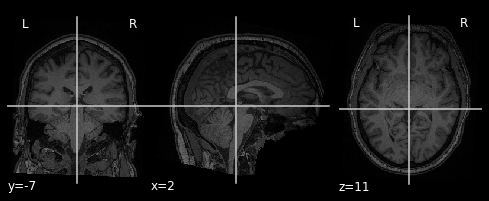

In [14]:
from nilearn.plotting import plot_anat
plot_anat(t1w_img);

# Looking at a NIFTI atlas

To look at atlas data - we are going to pull and atlas using `nilearn`'s built in data fetcher `nilearn.datasets`. The atlas we are pulling is a classic brain anatomy atlas from Harvord and Oxford known as the "Harvard Oxford Atlas".

This atlas comes in two important parts:
- **maps**: a nifti file that tells us `where` the regions are
- **labels**: in this case a list of names that tell us `what` the labels are.

In [15]:
from nilearn import datasets

HO_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')


print(HO_atlas.keys())

dict_keys(['maps', 'labels'])


Let's print the names of the brain regions in this atlas

In [16]:
HO_atlas.labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

The other component is the label "map" in this case a Nifti file of integer values. Let's start by grabbing this file and plotting the whole thing.

In [17]:
HO_atlas_filename = HO_atlas.maps

print('Atlas ROIs are located at: %s' % HO_atlas_filename)

Atlas ROIs are located at: /root/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz


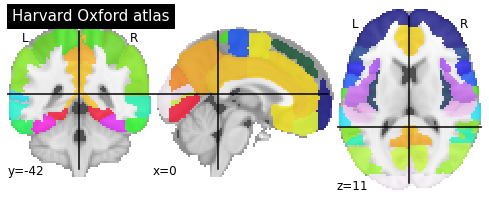

In [18]:
# plotting the whole atlas as shaded areas
plot_roi(HO_atlas_filename, title="Harvard Oxford atlas");

`nilearn` plotting as a nice feature that allows you to plot an atlas (or regions of interest - ROI) as contours.

/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays.py:103: UserWarning: No contour levels were found within the data range.
  **kwargs)


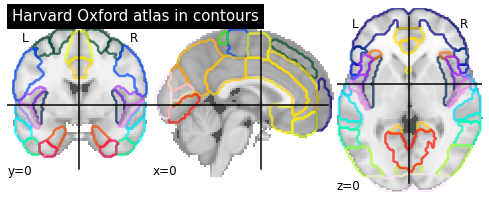

In [20]:
## plotting the whole atlas as contours
plot_roi(HO_atlas_filename, view_type='contours',
                  title="Harvard Oxford atlas in contours");

## What is in the atlas map file?

Let's load the atlas map with `nilearn` to see what data is inside it


In [21]:
atlas_map_img = nib.load(HO_atlas_filename)

atlas_map_img.shape # print the shape of the data

(91, 109, 91)

So we see that the atlas map is another 3-dimensional numpy data array. But what are the values inside it?

In [22]:
## using np to find the unique values in the image
np.unique(atlas_map_img.get_fdata())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48.])

Every voxel in this 91x101x91 contains a number (iteger) between zero to 48. The numbers 1-48 are for the individual brain maps and the number zero is usually reserved for voxels with no label.

Let's build a label table to make this clearer.

In [23]:
pd.DataFrame({'map_integer' : np.unique(atlas_map_img.get_fdata()),
              'lablename' : HO_atlas.labels})

,map_integer,lablename
0,0.0,Background
1,1.0,Frontal Pole
2,2.0,Insular Cortex
3,3.0,Superior Frontal Gyrus
4,4.0,Middle Frontal Gyrus
5,5.0,"Inferior Frontal Gyrus, pars triangularis"
6,6.0,"Inferior Frontal Gyrus, pars opercularis"
7,7.0,Precentral Gyrus
8,8.0,Temporal Pole
9,9.0,"Superior Temporal Gyrus, anterior division"


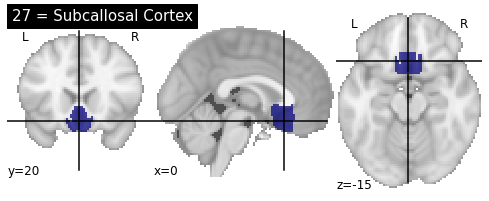

In [24]:
from  nilearn.image import math_img

## creates a new image where everything that was 27 is 1 and everything else is zero
## Note from the table abover 27-->Subcallosal Cortex
only_subcallousal = math_img('x==27', x=atlas_map_img) 

plot_roi(only_subcallousal, title = '27 = Subcallosal Cortex');

# Plotting atlases over individual participant scans

The above pictures of the brain atlas are plotted on top of a "template" brain. (the MNI template), in other words - no one person's brain.

Let's plot this template on top of our individual participants "raw" T1w image.

/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays.py:103: UserWarning: No contour levels were found within the data range.
  **kwargs)


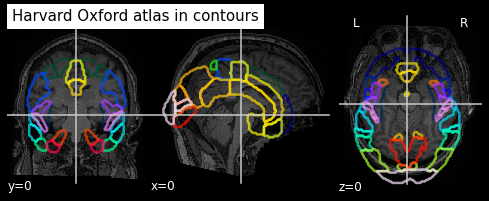

In [26]:
p1 = plot_roi(HO_atlas_filename, 
         bg_img=t1w_img,
         view_type='contours',
         title="Harvard Oxford atlas in contours");

##### Well - that looks bad

These images do not overlap at all! Why - because this T1w image has not been preprocessed and/or aligned to an altas. 

Registration of files to an "template" space is what we use to be able to compare data across participants. The process of how to do this "best" is the topic of decades of research. There's a large collection or tools to do this and templates to align too. For a list of templates check out [the BIDS coordinate space page](https://bids-specification.readthedocs.io/en/stable/99-appendices/08-coordinate-systems.html#image-based-coordinate-systems).

Luckily, the authors of this dataset have also made a preprocessed - aligned T1w image available from the same participant.

### Plotting atlas on a realigned participant image



/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays.py:103: UserWarning: No contour levels were found within the data range.
  **kwargs)


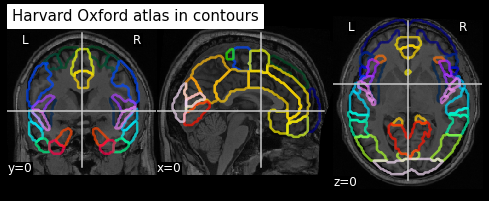

In [29]:
p2 = plot_roi(HO_atlas_filename, bg_img='data/sub-MSC01/anat/MSC01_mpr_debias_avgT_111_t88.nii.gz',
                          view_type='contours',
                  title="Harvard Oxford atlas in contours")

# Surfaces!!

_This section is taken from [data carpentry neuroimaging sMRI content](https://github.com/carpentries-incubator/SDC-BIDS-sMRI)_

The segmentation into GM and WM voxels allows to identify surfaces surrounding these tissues. The images below show:
- on the left: the delineation of GM (in pink) and WM (in blue) before discarding deep GM structures such as the basal ganglia
- on the right: the delineation of the outer GM layer called the pial surface (in red), and the underlying white matter surface (in blue) after discarding deep GM 

![Delineation of GM and WM](https://raw.githubusercontent.com/carpentries-incubator/SDC-BIDS-sMRI/gh-pages/fig/episode_4/GM_WM_surfaces_delineation.png)

We can now have a closer look at surface data !

#### Surface data

Some software such as Freesurfer specialize in surface data. Contrarily to volumetric data which are collections of voxels, surface data are collections of vertices and faces of a mesh. 

![Delineation of GM and WM](https://raw.githubusercontent.com/carpentries-incubator/SDC-BIDS-sMRI/gh-pages/fig/episode_4/mesh.png)

## Let's start by plotting the pial surface derived from our participants T1w image

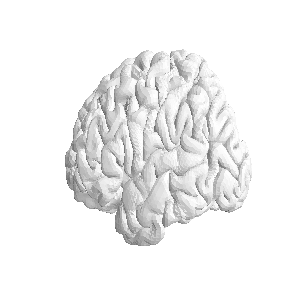

In [30]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

plot_surf('data/sub-MSC01/anat/MSC01.L.pial.32k_fs_LR.surf.gii');

## What's in a surface file

Disclaimer - there are actually a bunch of different surface file formats out there. In this lecture - we are going to try to focus on the bits that they all have in common.

The format we are working with here is teh GIFTI or surf.gii files.

All surface files have two components:
- **faces** 
- **vertices**

`nilearn` has a nice built in method that pulls these two components out of a gifti file. Let's run is on the pial surface we plotted above.

In [31]:
# The pial surface is the most external surface of the GM
pial_surf = nib.load('data/sub-MSC01/anat/MSC01.L.pial.32k_fs_LR.surf.gii')
pial_verts, pial_faces = pial_surf.agg_data(('pointset', 'triangle'))

The **vertices** in a surface refer to the individual points on the mesh - each point on the mesh is associate with a coordinate in 3-D space. (x,y,z). 

In [32]:
pial_verts

array([[ -4.9737964, -43.10144  ,  32.00985  ],
       [-19.599857 , -38.91996  ,  58.176678 ],
       [-53.846916 , -14.140749 ,  39.874935 ],
       ...,
       [-60.351177 , -42.845314 , -10.528455 ],
       [-63.15791  , -43.533318 , -10.125625 ],
       [-61.62633  , -45.037586 , -11.1129265]], dtype=float32)

The **faces** refers to the triangles in the mesh. Each face is associated with three **vertices** so set of three numbers in the list is a reference to an item in the **vertices** array above.  

In [33]:
pial_faces

array([[   68,    12,     0],
       [  180,    12,    68],
       [  180,    13,    12],
       ...,
       [ 8440, 32491, 21432],
       [ 8440,  8441, 32491],
       [    9,  8440, 21432]], dtype=int32)

Note that this means that the unique values in the **faces** amount to the total number of vertices.

Well see more of this when we plot the mesh for one brain area in the example at the end.

In [35]:
len(np.unique(pial_faces)) == pial_verts.shape[0]

True

## Things to remember about surfaces

In this section we will plot a bunch of combinations of surface files (to understand why there are soooo many surface files out there.

#### Every human has a unique set of surface folds!

In the example below we plot the left hemisphere pial surface from two different individuals.

Cortical surface folding is unique to the individual (like fingerprints) event idenfical twins have different folding patters!

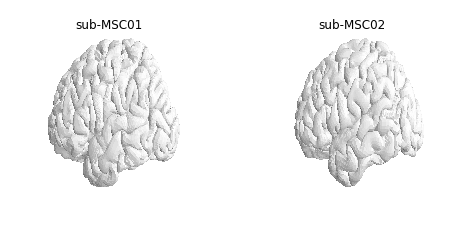

In [36]:

w, h = plt.figaspect(1 / 2)
fig, axs = plt.subplots(1,
                        2,
                        subplot_kw={'projection': '3d'},
                        figsize=(w, h))

plot_surf('data/sub-MSC01/anat/MSC01.L.pial.32k_fs_LR.surf.gii', axes = axs[0], title="sub-MSC01");
plot_surf('data/sub-MSC02/anat/MSC02.L.pial.32k_fs_LR.surf.gii', axes = axs[1], title="sub-MSC02");

### each individual cortex is actually has two surfaces

- *pial* : is the border between the cortex and the outside of your cortex
    - its' the red line in the figure
    - the name comes from pia matter, a membrane wrapping the outside of your cortex
- *white* is the border between your gray matter and white matter
    - it's depicted as the blue line in the figure 

The plot below shows the pial and white surfaces from the same person, same hemisphere (left)

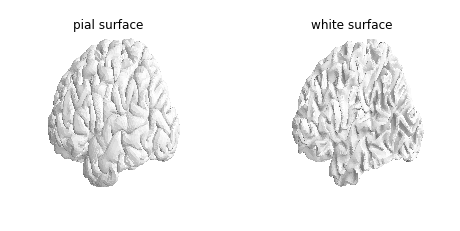

In [37]:
w, h = plt.figaspect(1 / 2)
fig, axs = plt.subplots(1,
                        2,
                        subplot_kw={'projection': '3d'},
                        figsize=(w, h))

plot_surf('data/sub-MSC01/anat/MSC01.L.pial.32k_fs_LR.surf.gii', axes = axs[0], title="pial surface");
plot_surf('data/sub-MSC01/anat/MSC01.L.white.32k_fs_LR.surf.gii', axes = axs[1], title="white surface");

Also - remember - your brain has a left and right hemisphere

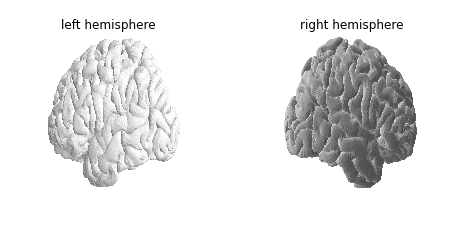

In [38]:
w, h = plt.figaspect(1 / 2)
fig, axs = plt.subplots(1,
                        2,
                        subplot_kw={'projection': '3d'},
                        figsize=(w, h))

plot_surf('data/sub-MSC01/anat/MSC01.L.pial.32k_fs_LR.surf.gii', axes = axs[0], title="left hemisphere");
plot_surf('data/sub-MSC01/anat/MSC01.R.pial.32k_fs_LR.surf.gii', hemi = "right", axes = axs[1], title="right hemisphere");

## surface atlases

We will use the example of an atlas of cortical regions devired from this person's anatomy

In this case - the regions are present in a GIFTI "label" file.

Let's plot this atlas/parcellation on top of the participants pial surface.


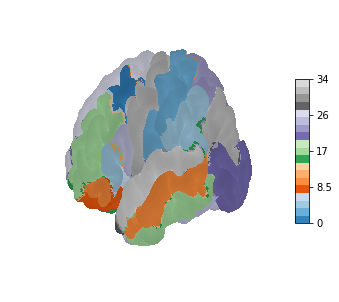

In [39]:
plot_surf(surf_mesh='data/sub-MSC01/anat/MSC01.L.pial.32k_fs_LR.surf.gii', 
                           surf_map='data/sub-MSC01/anat/MSC01.L.aparc.32k_fs_LR.label.gii',
                           bg_map = 'data/sub-MSC01/anat/MSC01.L.sulc.32k_fs_LR.shape.gii',
                           bg_on_data = True,
                           darkness = 0.3,
                           cmap="tab20c", colorbar=True);

## What's in this a surface mapped label file?

We still need access to two things
- a "map" of the integer values that refer to the parcellations
- some information about the labels

In [40]:
label_img = nib.load('data/sub-MSC01/anat/MSC01.L.aparc.32k_fs_LR.label.gii')

# using nibabel to grab the data in the label.gii file
label_map = label_img.agg_data() #'NIFTI_INTENT_LABEL'
label_map.shape

(32492,)

In [41]:
np.unique(label_map)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34], dtype=int32)

With GIFTI label files - the labels are embeded into the file metadata - we can pull them out into a pandas datafrom with the bit of code below.

In [48]:
labels_df = pd.DataFrame.from_dict(label_img.labeltable.get_labels_as_dict()   , orient = "index", columns=['labelname'])
labels_df

,labelname
0,???
1,caudalmiddlefrontal
2,entorhinal
3,postcentral
4,parstriangularis
5,supramarginal
6,insula
7,bankssts
8,lateralorbitofrontal
9,parsorbitalis


In [46]:
! pip list

Package                       Version            
----------------------------- -------------------
absl-py                       0.12.0             
alabaster                     0.7.12             
albumentations                0.1.12             
altair                        4.1.0              
appdirs                       1.4.4              
argon2-cffi                   20.1.0             
arviz                         0.11.2             
astor                         0.8.1              
astropy                       4.2.1              
astunparse                    1.6.3              
async-generator               1.10               
atari-py                      0.2.9              
atomicwrites                  1.4.0              
attrs                         21.2.0             
audioread                     2.1.9              
autograd                      1.3                
Babel                         2.9.1              
backcall                      0.2.0              


## let's try plotting the 3d mesh for one atlas region 


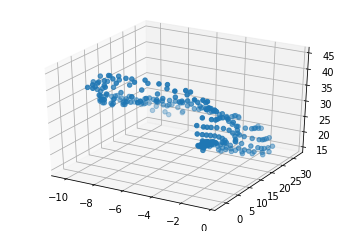

In [43]:
## caudalanteriorcingulate = 26 from table above

label_idx = np.where(label_map==26)[0]
roi_faces = pial_faces[label_idx,:]
roi_verts = pial_verts[label_idx,:]

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

x,y,z = roi_verts.T
ax.scatter3D(x,y,z);

In [44]:
def surf_data_from_dense_cifti(cifti, surf_name, map_index = "all", fill_value = np.nan):
    # the dscalar img is a filepath - load it
    if isinstance(cifti, (str, Path)):
        cifti = nib.load(cifti)
    axis = cifti.header.get_axis(1)
    data = cifti.get_fdata()
    if not map_index == "all":
        data = data[map_index,:]
    assert isinstance(axis, nib.cifti2.BrainModelAxis)
    for name, data_indices, model in axis.iter_structures():  # Iterates over volumetric and surface structures
        if name == surf_name:                                 # Just looking for a surface
            data = data.T[data_indices]                       # Assume brainmodels axis is last, move it to front
            vtx_indices = model.vertex                        # Generally 1-N, except medial wall vertices
            surf_data = np.zeros((vtx_indices.max() + 1,) + data.shape[1:], dtype=data.dtype)
            surf_data[:] = fill_value
            surf_data[vtx_indices] = data
            return surf_data
    raise ValueError(f"No structure named {surf_name}")

In [ ]:
help(nilearn.plotting.plot_surf)